In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

In [3]:
swedish_motor_insurance = pd.read_csv("swedish_motor_insurance.csv")
swedish_motor_insurance.head()

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
print(swedish_motor_insurance.mean())

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64


In [5]:
print(
    swedish_motor_insurance["n_claims"].corr(
        swedish_motor_insurance["total_payment_sek"]
    )
)

0.9128782350234067


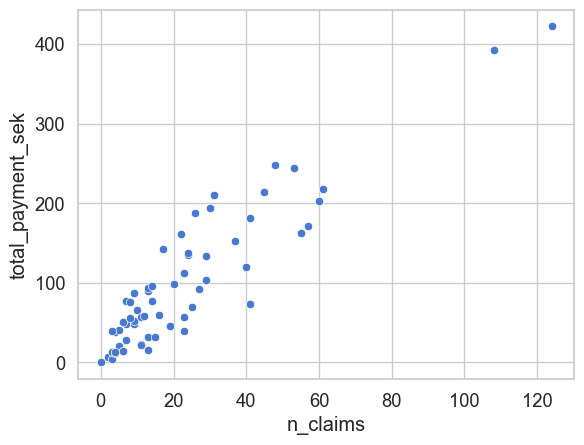

In [6]:
sns.scatterplot(x="n_claims", y="total_payment_sek", data=swedish_motor_insurance)
plt.show()

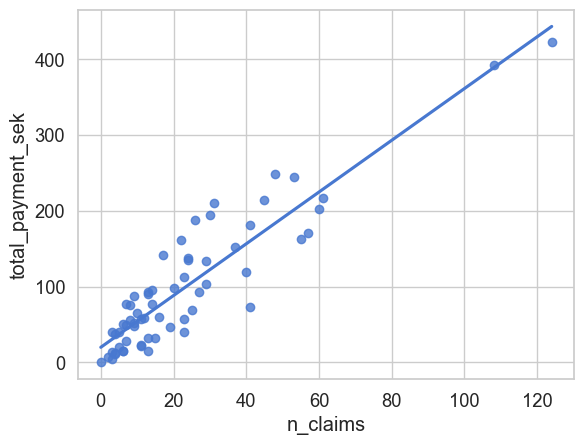

In [7]:
sns.regplot(x="n_claims", y="total_payment_sek", data=swedish_motor_insurance, ci=None)
plt.show()

In [8]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")
display(taiwan_real_estate.head())

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [9]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

mdl_price_vs_conv = mdl_price_vs_conv.fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


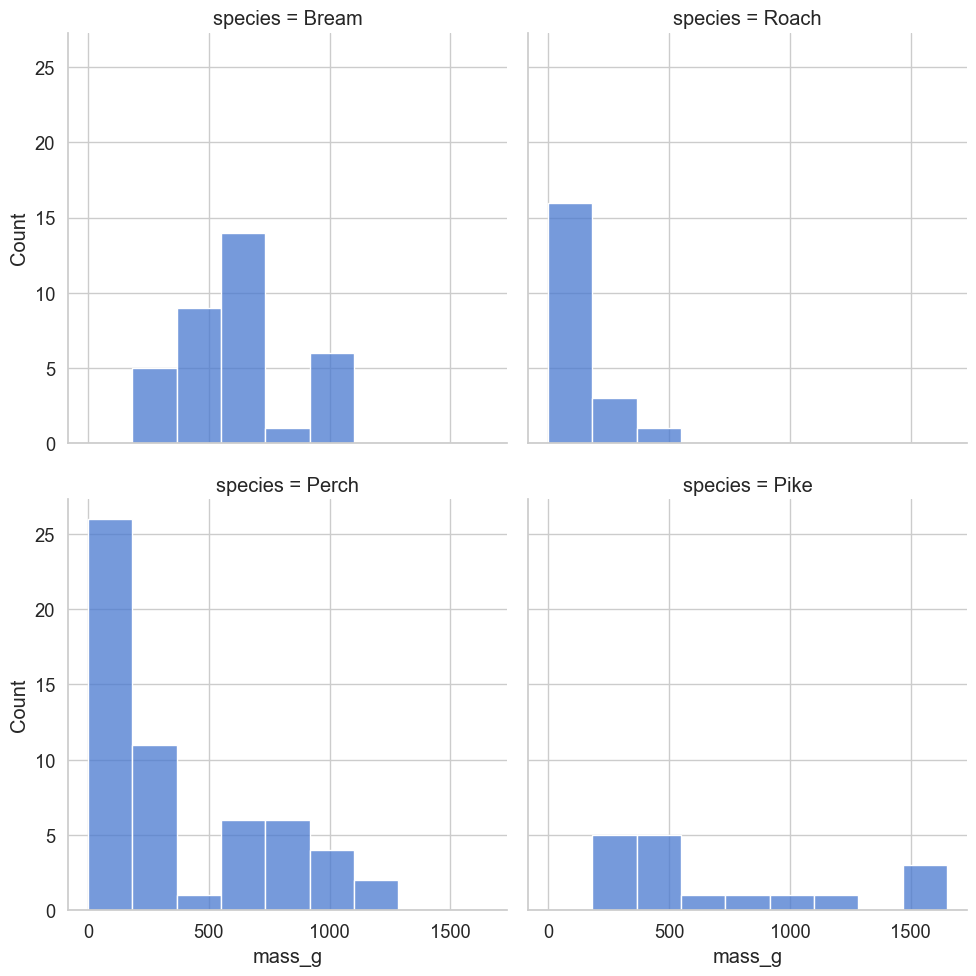

In [10]:
# Categorial Explanatory Variavles
fish = pd.read_csv("fish.csv")
sns.displot(data=fish, x="mass_g", col="species", col_wrap=2, bins=9)
plt.show()

In [11]:
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [12]:
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


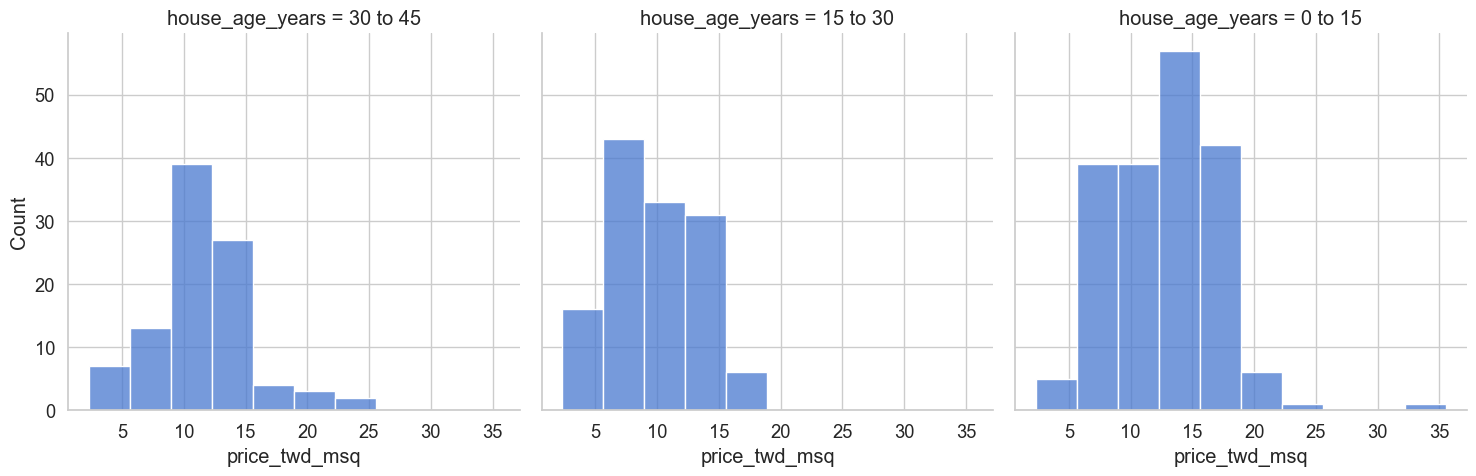

In [13]:
sns.displot(data=taiwan_real_estate, x="price_twd_msq", col="house_age_years", bins=10)
plt.show()

In [14]:
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")[
    "price_twd_msq"
].mean()
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [15]:
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [16]:
mdl_price_vs_age0 = ols(
    "price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate
).fit()
print(mdl_price_vs_age0.params)  # no intercept includes in the model

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [17]:
bream = fish[fish["species"] == "Bream"]
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


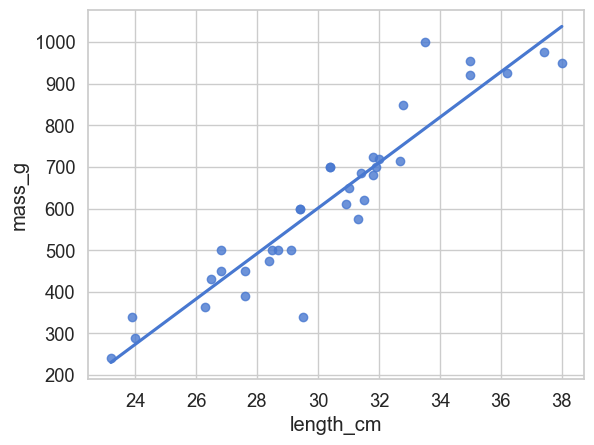

In [18]:
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
plt.show()

In [19]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [20]:
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})
explanatory_data.head()

,length_cm
0,20
1,21
2,22
3,23
4,24


In [21]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [22]:
prediction_data = explanatory_data.assign(
    mass_g=mdl_mass_vs_length.predict(explanatory_data)
)

display(prediction_data)

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


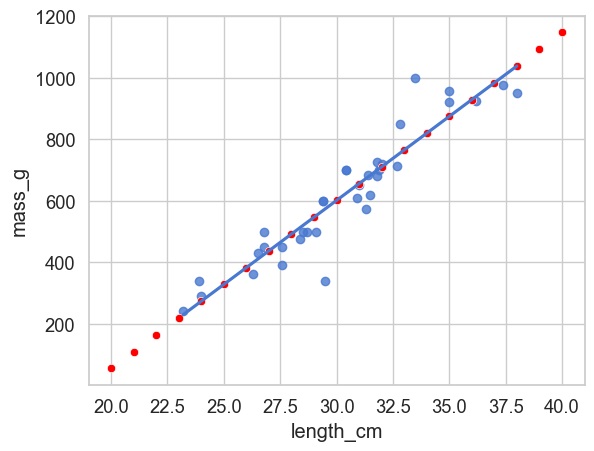

In [23]:
fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
sns.scatterplot(
    x="length_cm", y="mass_g", data=prediction_data, color="red", markers="s"
)
plt.show()

In [24]:
# Extraploating - prediction outside the range of observed data
little_bream = pd.DataFrame({"length_cm": [10]})
pred_little_bream = little_bream.assign(mass_g=mdl_mass_vs_length.predict(little_bream))
print(pred_little_bream)

   length_cm      mass_g
0         10 -489.847756


In [25]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


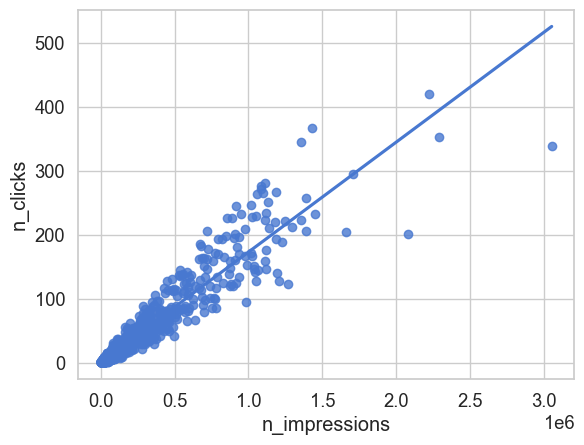

In [26]:
sns.regplot(x='n_impressions', y='n_clicks', data=ad_conversion, ci=None)
plt.show()

In [27]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


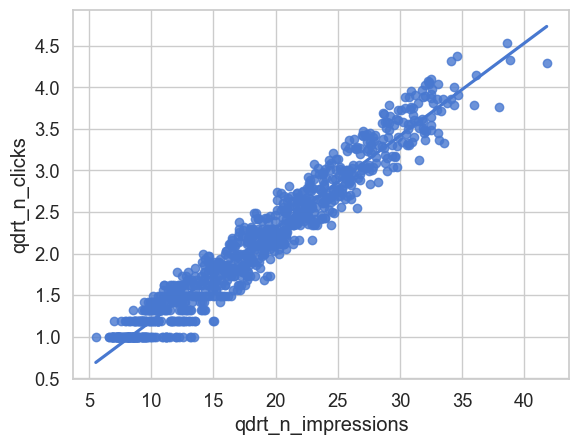

In [28]:
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion, ci=None)
plt.show()

In [29]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()
print(mdl_click_vs_impression.params)

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [30]:
prediction_data = pd.DataFrame({
    "qdrt_n_impressions": np.arange(0, 3000000, 500000) ** 0.25,
    "n_impressions": np.arange(0, 3000000, 500000)  # Keep this as a reference (no power transformation)
})

prediction_data["qdrt_n_clicks"] = mdl_click_vs_impression.predict(prediction_data)

print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696


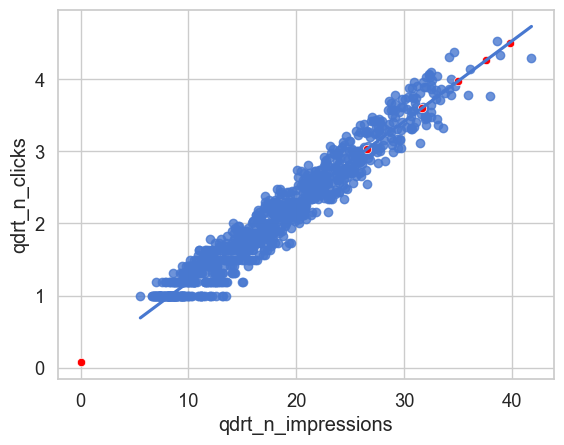

In [31]:
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()

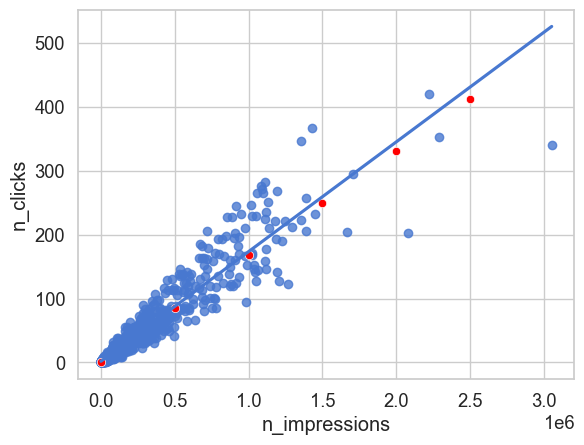

In [33]:
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
sns.scatterplot(x="n_impressions", y="n_clicks", data=prediction_data, color="red")
plt.show()

In [34]:
r_squared = mdl_click_vs_impression.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.9445272817143905


In [35]:
mse = mdl_click_vs_impression.mse_resid

rse = np.sqrt(mse)

print(f"Residual Standard Error (RSE): {rse}")

Residual Standard Error (RSE): 0.19690640896875725


### Interpretation of the Results:
1. #### R-squared:
- If R-squared is close to 1, it indicates that the model explains a large proportion of the variance in n_clicks based on n_impressions.
- If R-squared is close to 0, it indicates that the model does not explain much of the variance.
For example, an R-squared of 0.85 would mean that 85% of the variance in n_clicks is explained by n_impressions, indicating a good fit.

2. #### Residual Standard Error (RSE):
- The RSE represents the average size of the residuals (errors) in the units of the dependent variable (n_clicks).
- A lower RSE indicates a better fit since it suggests that the predicted values are close to the actual values.
- Higher RSE means the model is less accurate, and the residuals (errors) are larger.